In [0]:
!pip install h2o

     |████████████████████████████████| 123.7MB 109kB/s 
  Created wheel for h2o: filename=h2o-3.26.0.11-py2.py3-none-any.whl size=123721708 sha256=b551b54d168b111a2bc30d3ba12e068df9d418154dd7928a2a51397f34587237
  Stored in directory: /root/.cache/pip/wheels/71/e6/ed/fb9be80ae2eb0bef9deada74fc370b2532f578d8b00bc1a8fb
Successfully built h2o


In [0]:
import h2o

from IPython import get_ipython

import jupyter
import matplotlib.pyplot as plt

from pylab import rcParams

import numpy as np
import pandas as pd
import os

from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator

h2o.init(max_mem_size = 2)
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.4" 2019-07-16; OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3); OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5u5twcka
  JVM stdout: /tmp/tmp5u5twcka/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp5u5twcka/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.11
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_unknownUser_nx4aqr
H2O cluster total nodes:,1
H2O cluster free memory:,2 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [0]:
creditData = pd.read_csv(r"creditcard.csv")
creditData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [0]:
print("Few Entries: ")
print(creditData.head())
print("Dataset Shape: ", creditData.shape)
print("Maximum Transaction Value: ", np.max(creditData.Amount))
print("Minimum Transaction Value: ", np.min(creditData.Amount))

Few Entries: 
   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0     0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62    0.0
1     0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69    0.0
2     1 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66    0.0
3     1 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50    0.0
4     2 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99    0.0

[5 rows x 31 columns]
Dataset Shape:  (57531, 31)
Maximum Transaction Value:  12910.93
Minimum Transaction Value:  0.0


In [0]:
creditData.shape

(57531, 31)

In [0]:
creditData.isnull().values.any()

True

In [0]:
creditData.dropna(inplace=True)

In [0]:
creditData.isnull().values.any()

False

In [0]:
creditData_h2o = h2o.H2OFrame(creditData)

Parse progress: |█████████████████████████████████████████████████████████| 100%


Text(0, 0.5, 'Frequency')

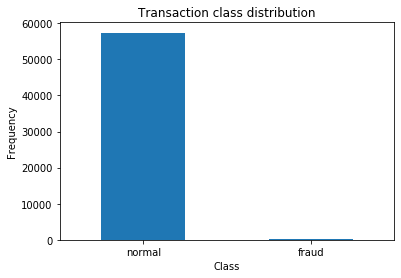

In [0]:
labels = ['normal', 'fraud']

classes = pd.value_counts(creditData['Class'], sort = True)
classes.plot(kind = 'bar', rot = 0)

plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

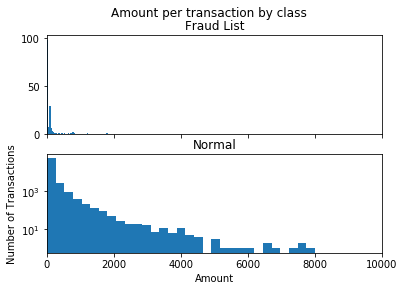

In [0]:
fraud = creditData[creditData.Class == 1]
normal = creditData[creditData.Class == 0]

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

ax1.hist(fraud.Amount, bins = 50)
ax1.set_title('Fraud List')

ax2.hist(normal.Amount, bins = 50)
ax2.set_title('Normal')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 10000))
plt.yscale('log')
plt.show()

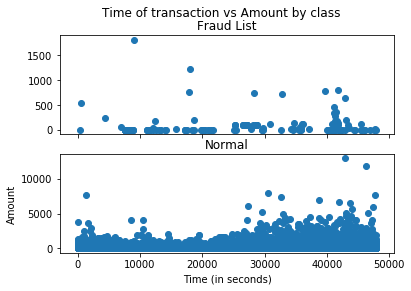

In [0]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud List')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

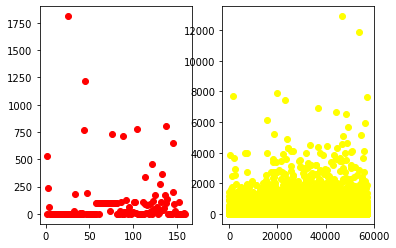

In [0]:
color = {1: 'red', 0: 'yellow'}
fraudlist = creditData[creditData.Class == 1]
normal = creditData[creditData.Class == 0]
fig, axes = plt.subplots(1, 2)

axes[0].scatter(list(range(1, fraudlist.shape[0] + 1)), fraudlist.Amount, color='red')
axes[1].scatter(list(range(1, normal.shape[0] + 1)), normal.Amount, color='yellow')
plt.show()

In [0]:
features = creditData_h2o.drop(['Time'], axis=1)

In [0]:
train, test = features.split_frame([0.8])
print(train.shape)
print(test.shape)

(45941, 30)
(11589, 30)


In [0]:
train_df = train.as_data_frame()
test_df = test.as_data_frame()

train_df = train_df[train_df['Class'] == 0]
train_df = train_df.drop(['Class'], axis=1)

Y_test_df = test_df['Class']

test_df = test_df.drop(['Class'], axis=1)
train_df.shape

(45815, 29)

In [0]:
train_h2o = h2o.H2OFrame(train_df)
test_h2o = h2o.H2OFrame(test_df)
x = train_h2o.columns

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
anomaly_model = H2ODeepLearningEstimator(activation = "Tanh",
                                         hidden = [14, 7, 7, 14],
                                         epochs = 100,
                                         standardize = True,
                                         stopping_metric = 'MSE',
                                         loss = 'automatic',
                                         train_samples_per_iteration = 32,
                                         shuffle_training_data = True,
                                         autoencoder = True,
                                         l1 = 10e-5)
anomaly_model.train(x=x, training_frame = train_h2o)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [0]:
anomaly_model._model_json['output']['variable_importances'].as_data_frame()

,variable,relative_importance,scaled_importance,percentage
0,V18,1.000000,1.000000,0.152962
1,V24,0.987800,0.987800,0.151096
2,V26,0.868555,0.868555,0.132856
3,V13,0.851147,0.851147,0.130193
4,V19,0.823849,0.823849,0.126018
5,V15,0.775035,0.775035,0.118551
6,V11,0.325276,0.325276,0.049755
7,V9,0.309417,0.309417,0.047329
8,V12,0.095189,0.095189,0.014560
9,V4,0.066161,0.066161,0.010120


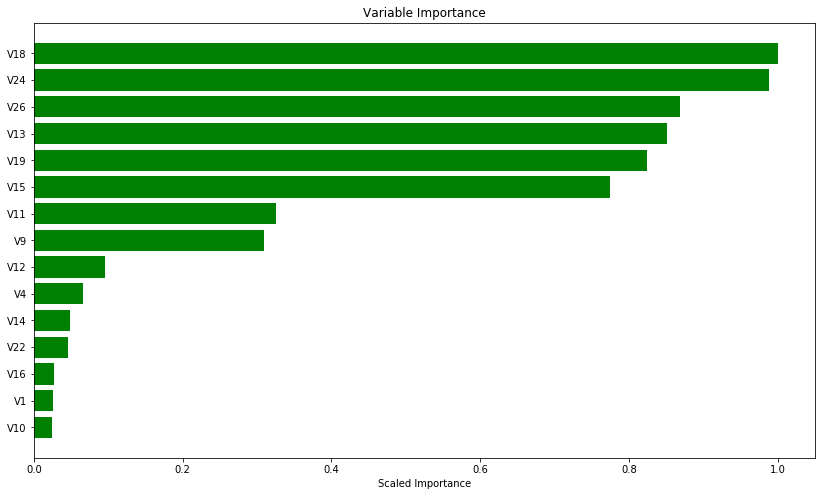

In [0]:
rcParams['figure.figsize'] = 14, 8
fig, ax = plt.subplots()

variables = anomaly_model._model_json['output']['variable_importances']['variable']
var = variables[0:15]
y_pos = np.arange(len(var))

scaled_importance = anomaly_model._model_json['output']['variable_importances']['scaled_importance']
sc = scaled_importance[0:15]

ax.barh(y_pos, sc, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

Text(0.5, 0, 'epoch')

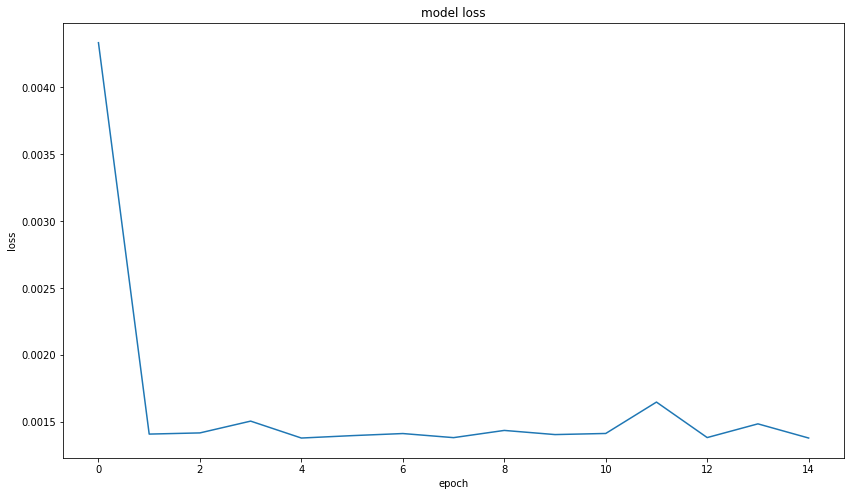

In [0]:
scoring_history = anomaly_model.score_history()
%matplotlib inline
rcParams['figure.figsize'] = 14, 8
plt.plot(scoring_history['training_mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

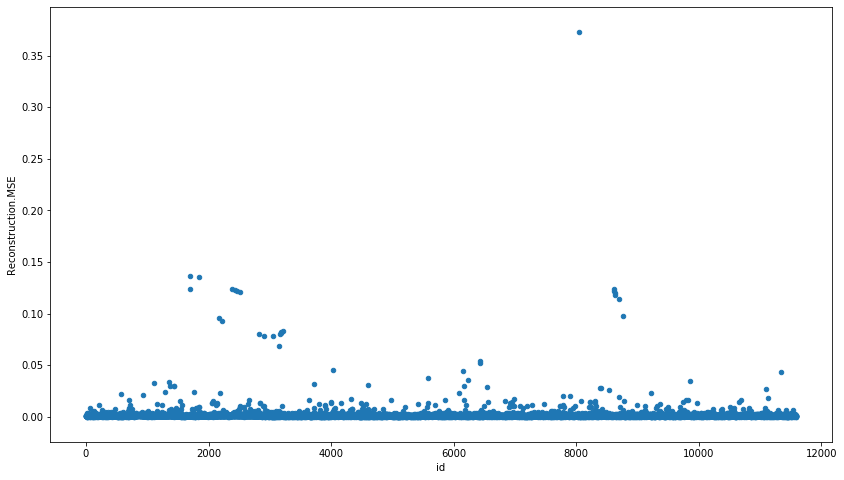

In [0]:
test_rec_error = anomaly_model.anomaly(test_h2o)
test_rec_error_df = test_rec_error.as_data_frame()

test_rec_error_df['id'] = test_rec_error_df.index
rcParams['figure.figsize'] = 14, 8
test_rec_error_df.plot(kind="scatter", x='id', y="Reconstruction.MSE")
plt.show()

In [0]:
predictions = anomaly_model.predict(test_h2o)

error_df = pd.DataFrame({'reconstruction_error': test_rec_error_df['Reconstruction.MSE'],
                         'true_class': Y_test_df})
error_df.describe()

deeplearning prediction progress: |███████████████████████████████████████| 100%


,reconstruction_error,true_class
count,11589.000000,11589.000000
mean,0.001564,0.002848
std,0.006182,0.053289
min,0.000099,0.000000
25%,0.000597,0.000000
50%,0.000939,0.000000
75%,0.001466,0.000000
max,0.372815,1.000000


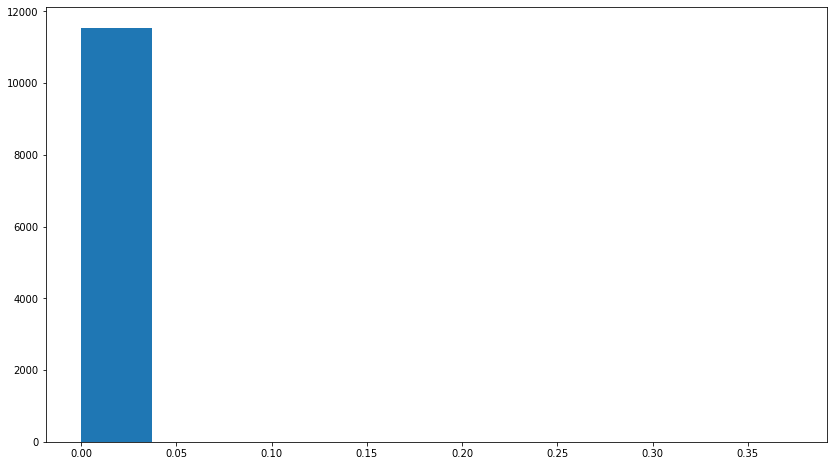

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
rcParams['figure.figsize'] = 14, 8
normal_error_df = error_df[(error_df['true_class'] == 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

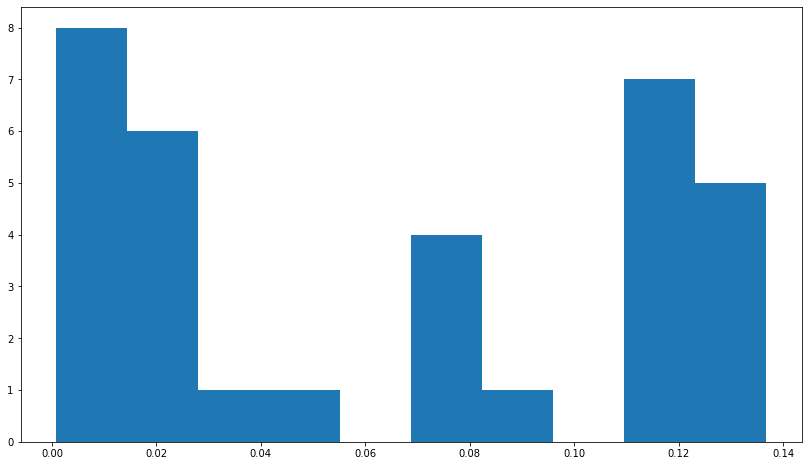

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
rcParams['figure.figsize'] = 14, 8
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

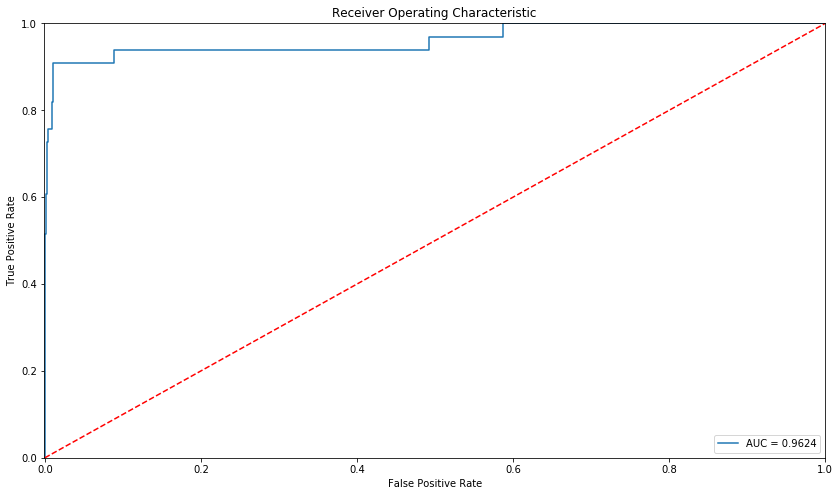

In [0]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

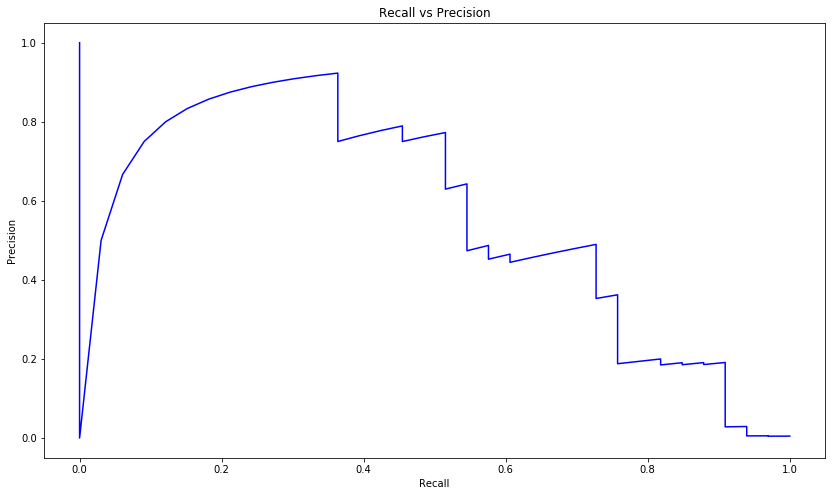

In [0]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

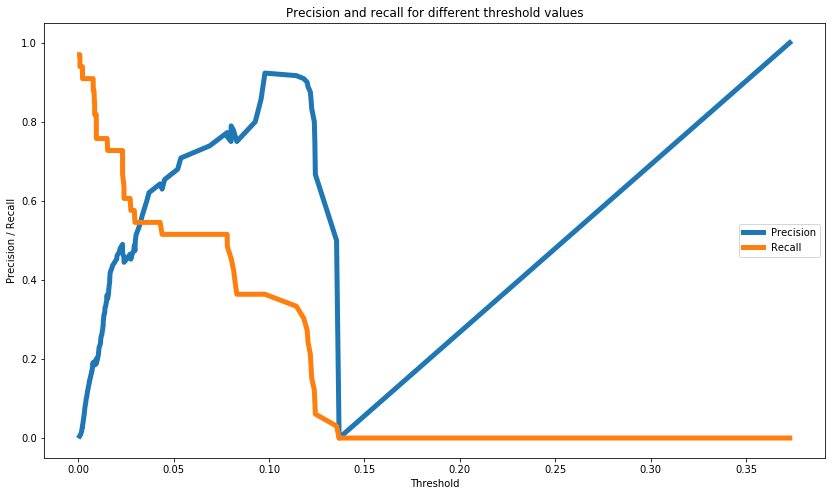

In [0]:
plt.plot(th, precision[1:], label="Precision", linewidth=5)
plt.plot(th, recall[1:], label="Recall", linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.legend()
plt.show()

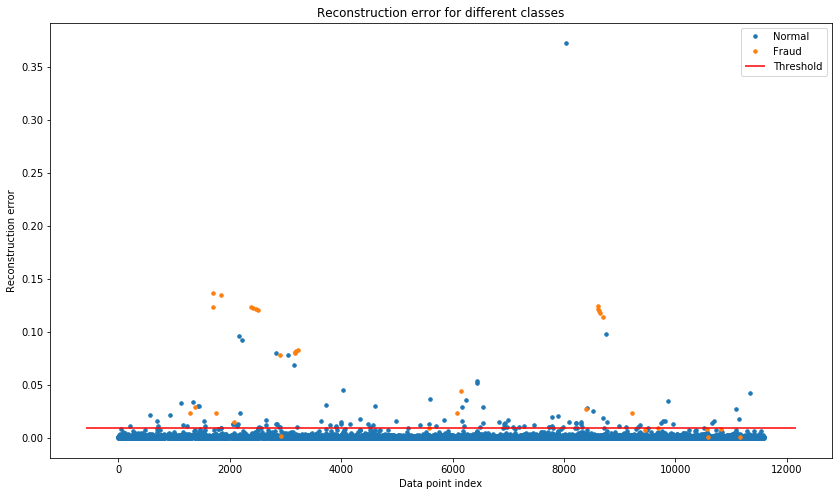

In [0]:
threshold = 0.01
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label="Fraud" if name == 1 else "Normal")

ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()

plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

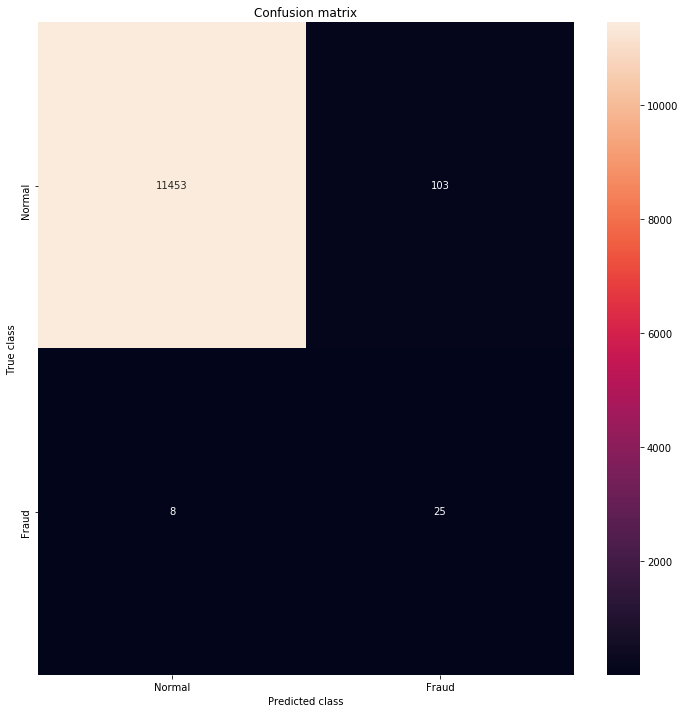

In [0]:
import seaborn as sns

LABELS = ['Normal', 'Fraud']
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))

sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")

plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

In [0]:
csr = classification_report(error_df.true_class, y_pred)
print(csr)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     11556
           1       0.20      0.76      0.31        33

    accuracy                           0.99     11589
   macro avg       0.60      0.87      0.65     11589
weighted avg       1.00      0.99      0.99     11589

